In [2]:
%matplotlib notebook 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time
from scipy import integrate

In [102]:
#constantes dadas en el problema
G     = 6.67e-11    
MT    = 5.9736e+24 
RT    = 6.371e+6  
ML    = 0.07349e+24 
RL    = 1.7374e+6 
d     = 3.844e+8    
w     = 2.6616e-6
Vt    = 11158  # Velcocidad de escape
theta = (24/180)*np.pi
Phi   = 0

In [32]:
# Se definen el sistema a integrar
def darFunciones( r_, phi_, Pr_, Pphi_, t_):
    
    Delta = (G*MT)/d**3
    mu    = ML/MT
    rpri  = np.sqrt(1+(r_**2)-(2*r_*np.cos(phi_-(w*t_)))) 
    
    d_r    = Pr_
    d_phi  = Pphi_/(r_**2)
    d_Pr   = Pphi_**2/r_**3 - Delta*(1/r_**2+ mu/rpri**3)
    d_Pphi = -Delta*mu*r_/rpri**3 * np.sin(phi_-w*t_)
    
    return d_r, d_phi, d_Pr, d_Pphi

In [176]:
def DarRK4(Condiciones_,t_):
    
    #Se define un paso h
    h = (t_[-1] - t_[0])/(len(t_)-1)
    
    
    # Array donde se guardará la solucion al sistema
    r    = np.zeros(len(t_))      
    phi  = np.zeros(len(t_))    
    Pr   = np.zeros(len(t_))    
    Pphi = np.zeros(len(t_))  
    
    #Se guardan en los array las Condiciones iniciales
    
    r[0]     = Condiciones_[0]      
    phi[0]   = Condiciones_[1]    
    Pr[0]    = Condiciones_[2]     
    Pphi[0]  = Condiciones_[3]  
    
    
    # Vectores asociados a Runge_Kutta donde son 4 al ser un RK4
    K1 = np.zeros(4)
    K2 = np.zeros(4)
    K3 = np.zeros(4)
    K4 = np.zeros(4)
    

    
    for i in tqdm(range(1,int(len(t_)))):
        
        K1[0] = darFunciones(r[i-1], phi[i-1], Pr[i-1], Pphi[i-1], t_[i-1])[0]  
        K1[1] = darFunciones(r[i-1], phi[i-1], Pr[i-1], Pphi[i-1], t_[i-1])[1] 
        K1[2] = darFunciones(r[i-1], phi[i-1], Pr[i-1], Pphi[i-1], t_[i-1])[2]  
        K1[3] = darFunciones(r[i-1], phi[i-1], Pr[i-1], Pphi[i-1], t_[i-1])[3]  

        K2[0] = darFunciones(r[i-1] + 0.5*h*K1[0], phi[i-1] + 0.5*h*K1[1], Pr[i-1] + 0.5*h*K1[2], Pphi[i-1] + 0.5*h*K1[3], t_[i-1] + 0.5*h)[0]
        K2[1] = darFunciones(r[i-1] + 0.5*h*K1[0], phi[i-1] + 0.5*h*K1[1], Pr[i-1] + 0.5*h*K1[2], Pphi[i-1] + 0.5*h*K1[3], t_[i-1] + 0.5*h)[1]
        K2[2] = darFunciones(r[i-1] + 0.5*h*K1[0], phi[i-1] + 0.5*h*K1[1], Pr[i-1] + 0.5*h*K1[2], Pphi[i-1] + 0.5*h*K1[3], t_[i-1] + 0.5*h)[2]
        K2[3] = darFunciones(r[i-1] + 0.5*h*K1[0], phi[i-1] + 0.5*h*K1[1], Pr[i-1] + 0.5*h*K1[2], Pphi[i-1] + 0.5*h*K1[3], t_[i-1] + 0.5*h)[3]

        K3[0] = darFunciones(r[i-1] + 0.5*h*K2[0], phi[i-1] + 0.5*h*K2[1], Pr[i-1] + 0.5*h*K2[2], Pphi[i-1] + 0.5*h*K2[3], t_[i-1] + 0.5*h)[0]
        K3[1] = darFunciones(r[i-1] + 0.5*h*K2[0], phi[i-1] + 0.5*h*K2[1], Pr[i-1] + 0.5*h*K2[2], Pphi[i-1] + 0.5*h*K2[3], t_[i-1] + 0.5*h)[1]
        K3[2] = darFunciones(r[i-1] + 0.5*h*K2[0], phi[i-1] + 0.5*h*K2[1], Pr[i-1] + 0.5*h*K2[2], Pphi[i-1] + 0.5*h*K2[3], t_[i-1] + 0.5*h)[2]
        K3[3] = darFunciones(r[i-1] + 0.5*h*K2[0], phi[i-1] + 0.5*h*K2[1], Pr[i-1] + 0.5*h*K2[2], Pphi[i-1] + 0.5*h*K2[3], t_[i-1] + 0.5*h)[3]

        K4[0] = darFunciones(r[i-1] + h*K3[0], phi[i-1] + h*K3[1], Pr[i-1] + h*K3[2], Pphi[i-1] + h*K3[3], t_[i-1] + h)[0]
        K4[1] = darFunciones(r[i-1] + h*K3[0], phi[i-1] + h*K3[1], Pr[i-1] + h*K3[2], Pphi[i-1] + h*K3[3], t_[i-1] + h)[1]
        K4[2] = darFunciones(r[i-1] + h*K3[0], phi[i-1] + h*K3[1], Pr[i-1] + h*K3[2], Pphi[i-1] + h*K3[3], t_[i-1] + h)[2]
        K4[3] = darFunciones(r[i-1] + h*K3[0], phi[i-1] + h*K3[1], Pr[i-1] + h*K3[2], Pphi[i-1] + h*K3[3], t_[i-1] + h)[3]
        
        # Se Guarda el resultado 
        r[i]     = r[i-1]    + h*(K1[0] + 2*K2[0] + 2*K3[0] + K4[0])/6
        phi[i]   = phi[i-1]  + h*(K1[1] + 2*K2[1] + 2*K3[1] + K4[1])/6
        Pr[i]    = Pr[i-1]   + h*(K1[2] + 2*K2[2] + 2*K3[2] + K4[2])/6
        Pphi[i]  = Pphi[i-1] + h*(K1[3] + 2*K2[3] + 2*K3[3] + K4[3])/6 
                  
    return r,phi,Pr,Pphi

In [278]:
#Condiciones iniciales del problema


r0     = RT/d   
phi0   = Phi   
theta0 = theta  
vescap = Vt 
Pr0    = (vescap*np.cos(theta0-phi0))/d
Pphi0  = (r0*vescap*np.sin(theta0-phi0))/d


Condiciones_iniciales = [r0, phi0, Pr0, Pphi0] 

# Mi tiempo
# El valor de finalizar el tiempo se escogio de forma arbitraria al realizar multiples veces la simulación

#Donde se incremento el tiempo de primeramente se hizo de a 50000 unidades de tiempo y luego 1000 unidades
# para obtener el valor más aproximado en la prueva

t = np.linspace(0.,610500., 61050)

# Guardo los resultados 
R, Phii, _, _ = DarRK4(Condiciones_iniciales, t)

100%|██████████| 61049/61049 [00:15<00:00, 4030.53it/s]


In [279]:
# Posiciones en cordenadas cartesianas para el Cohete
Pos_x = R*np.cos(Phii) 
Pos_y = R*np.sin(Phii)

# Posiciones en cordenadas cartesianas para la Luna
Lun_x = np.array([np.cos(w*t)])
Lun_y = np.array([np.sin(w*t)])

<IPython.core.display.Javascript object>


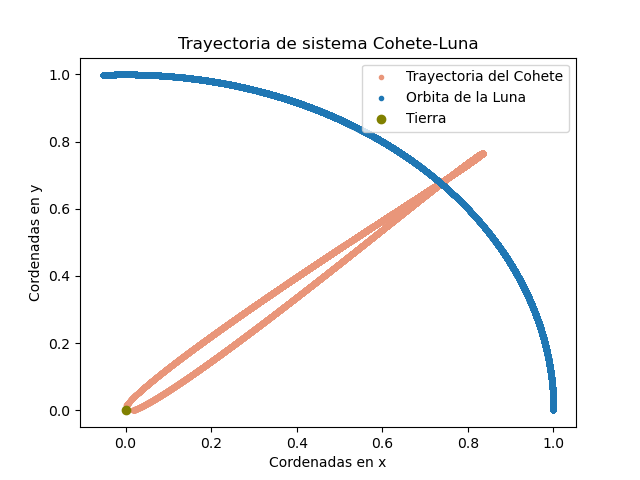

In [280]:
# Imagen que permite comprobar la trayectoria

plt.figure()
plt.title('Trayectoria de sistema Cohete-Luna')
plt.xlabel('Cordenadas en x')
plt.ylabel('Cordenadas en y')
plt.scatter(Pos_x, Pos_y, marker = '.', label = 'Trayectoria del Cohete', c='darksalmon')
plt.scatter(Lun_x, Lun_y, marker = '.', label = 'Orbita de la Luna')
plt.scatter(0,0, marker = 'o', label = 'Tierra', c = 'olive')
plt.legend(loc="upper right")
plt.show()

In [281]:
#Con el proposito de poder Animar el tiempo de vuelo se requiere reducir el tiempo en un factor de 1000 

def ReduceTime(t_, factor_):

    nuevo_tiempo = np.array([])
    
    for i in range(len(t_)):
        
        if i%factor_ == 0:
            nuevo_tiempo = np.append(nuevo_tiempo, t_[i])    
    
    return nuevo_tiempo

In [282]:

def RediccionPosicionesParaAnimacion(factor_reduccion, Pos_reducir): 
    
    Pos_reducida = np.array([])
        
    for i in range(1,len(Pos_reducir)):
            
        if i%factor_reduccion == 0:
            Pos_reducida = np.append(Pos_reducida, Pos_reducir[i])
    
    return Pos_reducida

#Factor de reducción
fac = 1000
# Reduccion para el tiempo
tiemp_red = ReduceTime(t, fac) 
# Reduccion para el cohete 
Posx_red = RediccionPosicionesParaAnimacion(fac, Pos_x)
Posy_red = RediccionPosicionesParaAnimacion(fac, Pos_y)
# Reduccion para la Luna
Lunx_red = RediccionPosicionesParaAnimacion(fac, Lun_x)
Luny_red = RediccionPosicionesParaAnimacion(fac, Lun_y)


<IPython.core.display.Javascript object>


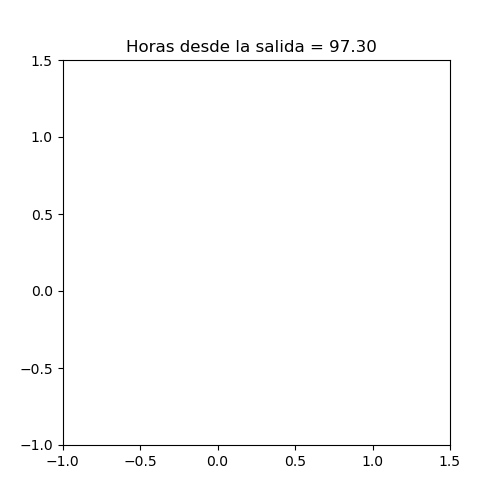

In [283]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(1,1,1)


def init():  
    
    ax.set_xlim(-1,1.5)
    ax.set_ylim(-1,1.5)
    


def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'Horas desde la salida = %.2f  ' %(tiemp_red[i]*0.000278), fontsize=12) 
    
    
    Pos_x_anim = Posx_red[i]
    Pos_y_anim = Posy_red[i]
    Lun_x_anim = Lunx_red[i]
    Lun_y_anim = Luny_red[i]
    
    
    circle_Tierra  = plt.Circle((0,0), RT/d, color='olive', fill = True, label = 'Tierra')
    circle_Luna    = plt.Circle((Lun_x_anim, Lun_y_anim), RL/d, color='tan', fill = True, label = 'Luna')    
    plot           = ax.add_patch(circle_Tierra)
    plot           = ax.add_patch(circle_Luna)
    
    plot           = ax.scatter(Pos_x_anim , Pos_y_anim, color='silver', s = 1,  label = 'Cohete')

    ax.legend(loc = 0)
    
    return plot


Animation = anim.FuncAnimation(fig,Update,frames=len(tiemp_red),init_func=init)
plt.show()

In [250]:
# Intento por RK4 Adaptativo 


# Definimos nuetro incremento
def incremento(f, t0_, r0_, phi0_, Pphi0_, Pr0_, h):
    
    New_Y = np.array([])
    nueva_y = 0
        
    k1 = darFunciones(t0_, r0_, phi0_, Pphi0_, Pr0_)
    k2 = darFunciones(t0_ + 0.5*h,  r0_+ 0.5*h*k1[0], phi0_+ 0.5*h*k1[1], Pphi0_+ 0.5*h*k1[3], Pr0_+ 0.5*h*k1[2])
    k3 = darFunciones(t0_ + 0.5*h,  r0_+ 0.5*h*k2[0], phi0_+ 0.5*h*k2[1], Pphi0_+ 0.5*h*k2[3], Pr0_+ 0.5*h*k2[2])
    k4 = darFunciones(t0_ + h,  r0_+ h*k3[0], phi0_+ h*k3[1], Pphi0_+ h*k3[3], Pr0_+ h*k3[2])
        
    for i in range(4):
        nueva_y = h*(k1[i]+2*k2[i]+2*k3[i]+k4[i])/6.
        New_Y = np.append(New_Y, nueva_y)

    return New_Y

In [251]:
# Verificamos nuestro paso para no tener errores por causa del paso ya sean muy grandes o muy pequeños
def VerificarPaso(paso, MedioPaso, PasoDoble, h, dxmin=0.1,dxmax = 1):
    
    dt_min = 1e-3
    
    if np.abs(paso) < dt_min:
        h = dt_min
        dx = paso
        
    else:
        
        if np.abs(paso) > dt_min and np.abs( paso - MedioPaso ) / np.abs( paso ) > dxmax:
            h = 0.5*h
            dx = MedioPaso 
            
        elif np.abs(paso) > dt_min and np.abs( paso - PasoDoble) / np.abs( paso ) < dxmin:
            
            h = 2*h
            dx = PasoDoble
        else:
            dx = paso
            
    return dx, h

In [ ]:
def AdaRK4(f, t0_, r0_, phi0_, Pphi0_, Pr0_, h=10, tmax=302):
    
    t   = t0_
    r   = r0_
    phi = phi0_
    Pr  = Pr0_
    Pphi= Pphi0_
    
    Time = np.array([])
    
    # Arrays para guardar la solución al sistema de ecuaciones
    Sol_r   = np.array([])
    Sol_phi = np.array([])
    Sol_Pr  = np.array([])
    Sol_Pphi= np.array([])
    
    # Pasos
    Paso = np.array([])
    
    while t < tmax:
        
        Paso = np.append(Paso,h)
        
        f = darFunciones(t, r, phi, Pphi, Pr)
        
        Paso  = np.array([]) 
        paso1 = incremento(f, t, r, phi, Pphi, Pr, h)[0]
        paso2 = incremento(f, t, r, phi, Pphi, Pr, h)[1]
        paso3 = incremento(f, t, r, phi, Pphi, Pr, h)[2]
        paso4 = incremento(f, t, r, phi, Pphi, Pr, h)[3]
        
        Paso = np.append(Paso, paso1)
        Paso = np.append(Paso, paso2)
        Paso = np.append(Paso, paso3)
        Paso = np.append(Paso, paso4)
        
        paso = np.min(Paso) 
        
        
        PasoM  = np.array([]) 
        MedioPaso1 = incremento(f, t, r, phi, Pphi, Pr, h*0.5)[0]
        MedioPaso2 = incremento(f, t, r, phi, Pphi, Pr, h*0.5)[1]
        MedioPaso3 = incremento(f, t, r, phi, Pphi, Pr, h*0.5)[2]
        MedioPaso4 = incremento(f, t, r, phi, Pphi, Pr, h*0.5)[3]
        PasoM = np.append(PasoM, MedioPaso1)
        PasoM = np.append(PasoM, MedioPaso2)
        PasoM = np.append(PasoM, MedioPaso3)
        PasoM = np.append(PasoM, MedioPaso4)
        
        MedioPaso = np.min(PasoM)
        
        
        PasoD  = np.array([]) 
        PasoDoble1 = incremento(f, t, r, phi, Pphi, Pr, h*2)[0]
        PasoDoble2 = incremento(f, t, r, phi, Pphi, Pr, h*2)[1]
        PasoDoble3 = incremento(f, t, r, phi, Pphi, Pr, h*2)[2]
        PasoDoble4 = incremento(f, t, r, phi, Pphi, Pr, h*2)[3]
        
        PasoD = np.append(PasoD, PasoDoble1)
        PasoD = np.append(PasoD, PasoDoble2)
        PasoD = np.append(PasoD, PasoDoble3)
        PasoD = np.append(PasoD, PasoDoble4)
        
        PasoDoble = np.min(PasoD)
        
        dr   ,  h1 = VerificarPaso(paso, MedioPaso, PasoDoble, h)
        dphi ,  h2 = VerificarPaso(paso, MedioPaso, PasoDoble, h)
        dPr  ,  h3 = VerificarPaso(paso, MedioPaso, PasoDoble, h)
        dPphi,  h4 = VerificarPaso(paso, MedioPaso, PasoDoble, h)
        H = np.array([h1,h2,h3,h4])
        h = np.min(H)
        
        r   += dr
        phi += dphi
        Pr  += dPr
        Pphi+= dphi
        t += h
        
        
        Time = np.append(Time, t)
        
        Sol_r   = np.append(Sol_r, r)
        Sol_phi = np.append(Sol_phi, phi)
        Sol_Pr  = np.append(Sol_Pr, Pr)
        Sol_Pphi= np.append(Sol_Pphi, Pphi)
        
    return Time, Sol_r, Sol_phi, Sol_Pr, Sol_Pphi, Paso   